In [52]:
import pandas as pd
import numpy as np

In [3]:
%ls data

MASTER_TRAFFIC_COUNT.csv


In [74]:
data = pd.read_csv(
    "./data/MASTER_TRAFFIC_COUNT.csv",
    low_memory=False,
    usecols=[
        "Main Location",
        "Locator",
        "Second Location",
        "Date",
        "Dir",
        "Volume",
        "AM PHV",
        "PM PHV",
        "ADT",
        "AAWDT",
        "AAWET",
    ],
    parse_dates=["Date"],
    dtype={
        "Dir": "category",
        "Locator": "category",
        "Volume": pd.Int64Dtype(),
    },
)
data = data.dropna(axis="columns", how="all")

In [57]:
data.head()

,Main Location,Locator,Second Location,Date,Dir,Volume,AM PHV,PM PHV,ADT,AAWDT,AAWET
0,S DAHLIA ST,BETWEEN,E ALAMEDA AVE & LEETSDALE DR,2015-11-10,SB,<NA>,194.0,307.0,NaN,2771,NaN
1,LEETSDALE DR,BETWEEN,S DAHLIA ST & S ELM ST,2015-11-10,WB,<NA>,1510.0,1113.0,NaN,17251,NaN
2,LEETSDALE DR,BETWEEN,S DAHLIA ST & S CHERRY ST,2015-11-10,EB,<NA>,1003.0,1468.0,NaN,17204,NaN
3,E FLORIDA AVE,BETWEEN,S PENNSYLVAINIA ST & S LOGAN ST,2015-11-06,EB,<NA>,31.0,40.0,NaN,448,NaN
4,E FLORIDA AVE,BETWEEN,S PENNSYLVAINIA ST & S LOGAN ST,2015-11-06,WB,<NA>,53.0,86.0,NaN,890,NaN


In [58]:
data["Main Location"].value_counts()

48TH AVE             300
ALAMEDA              292
COLORADO BLVD        266
EVANS                255
YOSEMITE ST          184
                    ... 
JACKSON ST             1
E35TH AVE              1
E 35TH AVE             1
MEXICO AVE             1
EASE DAKOTA   AVE      1
Name: Main Location, Length: 649, dtype: int64

In [66]:
broadway_and_evans = data[
    data["Main Location"].apply(lambda x: "BROADWAY" in x)
    & data["Second Location"].apply(lambda x: "EVANS" in x)
    & data["Locator"].apply(lambda x: "S/O" == x or "N/O" == x)
]

In [70]:
broadway_and_evans.head()

,Main Location,Locator,Second Location,Date,Dir,Volume,AM PHV,PM PHV,ADT,AAWDT,AAWET
3462,BROADWAY,N/O,EVANS,2008-02-07,S/B,14118,840.0,1492.0,NaN,NaN,NaN
3469,BROADWAY,N/O,EVANS,2008-02-06,S/B,14409,826.0,1562.0,NaN,NaN,NaN
3476,BROADWAY,N/O,EVANS,2008-02-05,S/B,12060,673.0,1283.0,NaN,NaN,NaN
3500,BROADWAY,N/O,EVANS,2008-01-17,S/B,13077,815.0,1321.0,NaN,NaN,NaN
3512,BROADWAY,N/O,EVANS,2008-01-16,S/B,12771,780.0,1307.0,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

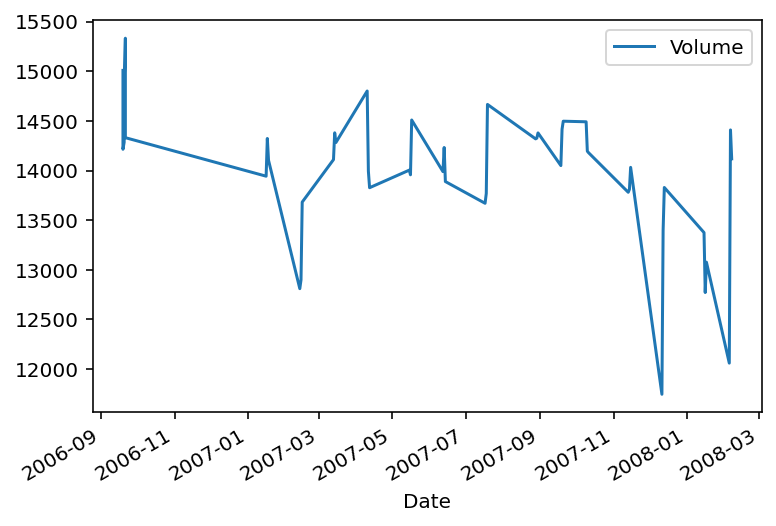

In [73]:
broadway_and_evans.plot(x="Date", y="Volume")

<AxesSubplot:ylabel='Frequency'>

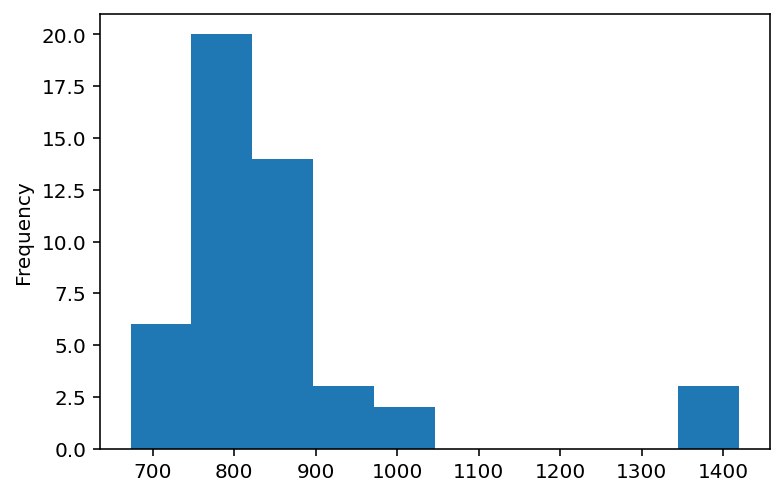

In [71]:
broadway_and_evans["AM PHV"].dropna().plot.hist()

<AxesSubplot:ylabel='Frequency'>

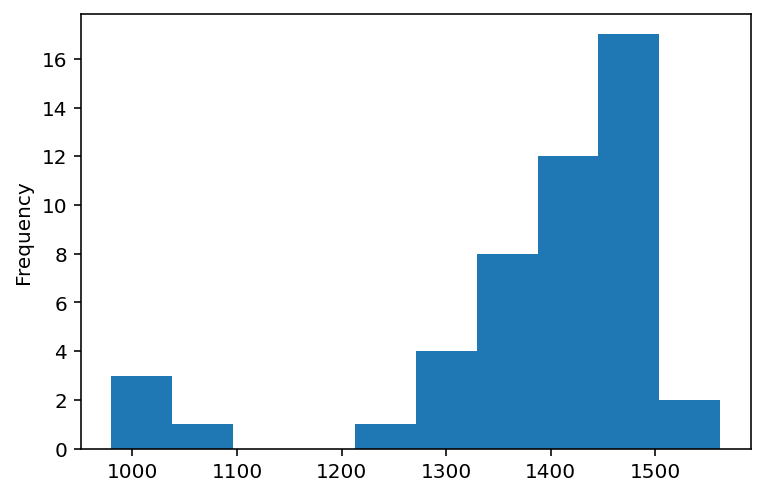

In [72]:
broadway_and_evans["PM PHV"].dropna().plot.hist()